## It takes too long for machine learning models to diffuse to diseases of the poor 

The main question we seek to answer is:
- How well has machine learning been adopted by Biologists?
- Compared with cancer research, how well has machine learning been adopted?

This notebook supports the [medium article](https://medium.com/@siwomolbio/machinelearning4malaria-e171ca85e7f5)

pubmed data downloaded on 3rd May, 2019. 

In [1]:
from Bio import Entrez
import pandas as pd

import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
Entrez.email = "calebkibet88@gmail.com"

In [3]:
other_tech = ['"DNA sequencing"', '"PCR"',
              '"ELISA"','"microarray"',
              '"Sanger sequencing"','"Nanopore sequencing"',
              '"GWAS"']

In [ ]:
ml = ['"machine learning"','"neural networks"',
     '"support vector machine"',
     '"k-nearest neighbor"',
     '"linear regression"',
     '"random forests"',
     '"logistic regression"',
     '"convolutional neural networks"','"bayesian networks"', '"data science"']

## Download data Details from PubMed

Using the code below, we get to fetch the data we are interested which talks about malaria and the various machine learning models. 

In [6]:
# make a placeholder to store result from querying 
def get_count(disease,ml):
    df = pd.DataFrame(columns=["ML_algorithm", "Count", 'First_Paper','Latest_paper'])
    for machine in ml:
        handle = Entrez.esearch(db = "pubmed", retmax=10000000, term="[%s] AND %s" % (machine,disease))
        kenyan_records = Entrez.read(handle)
        kenyan_pubids = kenyan_records["IdList"]
        
        handle_1 = Entrez.esummary(db="pubmed", id = kenyan_pubids[0])
        handle_2 = Entrez.esummary(db="pubmed", id = kenyan_pubids[-1])
        
        record_1 = Entrez.read(handle_1)
        record_2 = Entrez.read(handle_2)
        # see what we are capable of subsetting
        
        df.loc[len(df)]= [machine.replace('"',''), len(kenyan_pubids), record_2[0]["PubDate"],record_1[0]["PubDate"]]
        
    #df.to_csv()
    return df
        

In [7]:
cancer_df = get_count("cancer",ml)
cancer_df

,ML_algorithm,Count,First_Paper,Latest_paper
0,machine learning,6784,1990 Oct,2021 Mar 17
1,neural networks,4081,1989 May,2021 Mar 19
2,support vector machine,2745,2000 Oct,2021 Mar 18
3,k-nearest neighbor,382,1992 Jun,2021 Feb 23
4,linear regression,9886,1975 Jun,2021 Mar 19
5,random forests,315,2003 Apr 1,2021 Mar 16
6,logistic regression,51725,1976,2021 Mar 11
7,convolutional neural networks,811,2013,2021 Mar 19
8,bayesian networks,156,1995,2021 Feb 26
9,data science,2230,2007 Oct,2021 Mar 17


In [8]:
malaria_df = get_count("malaria",ml)
malaria_df

,ML_algorithm,Count,First_Paper,Latest_paper
0,machine learning,136,2008 Apr 16,2021 Mar 16
1,neural networks,48,2001,2020 Dec
2,support vector machine,25,2008 Feb 15,2021 Feb
3,k-nearest neighbor,7,2010 Mar,2019 Jul
4,linear regression,266,1983 Dec,2021 Mar
5,random forests,7,2013 Feb 11,2021 Feb
6,logistic regression,1283,1987 Oct,2021 Mar 18
7,convolutional neural networks,8,2018,2020 Dec
8,bayesian networks,3,2015 Aug 28,2018 Jan
9,data science,28,2017 Dec,2021 Feb


In [9]:
other_tech_cancer = get_count("cancer",other_tech)
other_tech_cancer

,ML_algorithm,Count,First_Paper,Latest_paper
0,DNA sequencing,6206,1978 Jun 27,2021 Mar 20
1,PCR,122366,1978 Mar,2021 Mar 20
2,ELISA,23705,1978,2021 Mar 17
3,microarray,36986,1953 Jan,2021 Mar 20
4,Sanger sequencing,2708,1995 Feb,2021
5,Nanopore sequencing,78,2013 Jan,2021 Feb 23
6,GWAS,2830,1997 Feb,2021 Mar 20


In [46]:
other_tech_malaria = get_count("malaria",other_tech)
other_tech_malaria

,ML_algorithm,Count,First_Paper,Latest_paper
0,DNA sequencing,221,1988 Feb,2021 Mar 17
1,PCR,4983,1983 Dec,2021 Mar
2,ELISA,1929,1976,2021 Mar 19
3,microarray,387,2000 Jan,2020
4,Sanger sequencing,49,2012 May,2021 Mar 11
5,Nanopore sequencing,5,2018 May 29,2021 Mar 15
6,GWAS,41,2008 Jul 1,2020 Nov 23


In [10]:
tuberculosis_df = get_count("tuberculosis",ml)
tuberculosis_df

,ML_algorithm,Count,First_Paper,Latest_paper
0,machine learning,206,2002 Feb,2021
1,neural networks,107,1994 Mar,2020
2,support vector machine,68,2006 Jan-Feb,2020 Nov 30
3,k-nearest neighbor,8,1994 Mar,2020 Sep
4,linear regression,379,1976,2021 Mar 6
5,random forests,4,2004 Sep 28,2019 Jun
6,logistic regression,2922,1981 Jul,2021
7,convolutional neural networks,22,2017 Aug,2020
8,bayesian networks,4,2004 Mar,2019
9,data science,52,2015 May,2021 Mar 18


In [21]:
other_tech_tb = get_count("tuberculosis",other_tech)
other_tech_tb

,ML_algorithm,Count,First_Paper,Latest_paper
0,DNA sequencing,558,1988 Apr,2021 Mar 3
1,PCR,6484,1990-1991,2021 Feb 24
2,ELISA,2479,1976 Mar,2021 Feb 26
3,microarray,593,1950 Nov 18,2021
4,Sanger sequencing,90,2010 Jul,2021
5,Nanopore sequencing,5,2015 Dec 21,2020 Dec 17
6,GWAS,70,2011 Mar,2021 Mar 5


Now we can clean the dataframes to include delay details and the year of First Publication

In [37]:
def clean_df(df,disease):
    #df['date'] = pd.to_datetime(df['First_Paper'])
    df['date'] = df.apply(
    lambda row: pd.to_datetime(row['First_Paper']), axis=1)
    df['year_%s' % disease] = df.date.dt.year
    df  = df[['ML_algorithm','Count','year_%s' % disease]]
    df.columns = ['ML_algorithm','%s_Count' % disease,'year_%s' % disease]
    
    return df

In [38]:
malaria_clean = clean_df(malaria_df,'malaria')
malaria_clean

,ML_algorithm,malaria_Count,year_malaria
0,machine learning,136,2008
1,neural networks,48,2001
2,support vector machine,25,2008
3,k-nearest neighbor,7,2010
4,linear regression,266,1983
5,random forests,7,2013
6,logistic regression,1283,1987
7,convolutional neural networks,8,2018
8,bayesian networks,3,2015
9,data science,28,2017


In [39]:
cancer_clean = clean_df(cancer_df,'cancer')
cancer_clean

,ML_algorithm,cancer_Count,year_cancer
0,machine learning,6784,1990
1,neural networks,4081,1989
2,support vector machine,2745,2000
3,k-nearest neighbor,382,1992
4,linear regression,9886,1975
5,random forests,315,2003
6,logistic regression,51725,1976
7,convolutional neural networks,811,2013
8,bayesian networks,156,1995
9,data science,2230,2007


In [40]:
def merge_data(df1,df2,disease1,disease2):
    """
    Ceates a merged dataframe of two diseases being compared
    with the delay in tech adoption in years
    """
    marged_data = pd.merge(df1, df2, on='ML_algorithm')
    marged_data['delay'] = marged_data['year_%s' % disease2] - marged_data['year_%s' % disease1]
    marged_data.set_index('ML_algorithm',inplace=True)
    return  marged_data

In [41]:
malaria_cancer_ml = merge_data(cancer_clean,malaria_clean,"cancer","malaria")

In [42]:
malaria_cancer_ml.delay.mean()

12.0

In [76]:
malaria_cancer_ml

,cancer_Count,year_cancer,malaria_Count,year_malaria,delay
ML_algorithm,,,,,
machine learning,6784,1990,136,2008,18
neural networks,4081,1989,48,2001,12
support vector machine,2745,2000,25,2008,8
k-nearest neighbor,382,1992,7,2010,18
linear regression,9886,1975,266,1983,8
random forests,315,2003,7,2013,10
logistic regression,51725,1976,1283,1987,11
convolutional neural networks,811,2013,8,2018,5
bayesian networks,156,1995,3,2015,20


In [47]:
other_cancer = clean_df(other_tech_cancer,'cancer')
other_malaria = clean_df(other_tech_malaria,'malaria')

In [48]:
malaria_cancer_other = merge_data(other_cancer,other_malaria,"cancer","malaria")

In [49]:
malaria_cancer_other

,cancer_Count,year_cancer,malaria_Count,year_malaria,delay
ML_algorithm,,,,,
DNA sequencing,6206,1978,221,1988,10
PCR,122366,1978,4983,1983,5
ELISA,23705,1978,1929,1976,-2
microarray,36986,1953,387,2000,47
Sanger sequencing,2708,1995,49,2012,17
Nanopore sequencing,78,2013,5,2018,5
GWAS,2830,1997,41,2008,11


In [50]:
malaria_cancer_other.delay.mean()

13.285714285714286

The total number of papers in PubMed mentioning cancer are 4281357

In [51]:
handle = Entrez.esearch(db = "pubmed", retmax=10000000, term="cancer")
kenyan_records = Entrez.read(handle)
cancer_total = len(kenyan_records["IdList"])
cancer_total

4281357

While for malaria, we have 99759 papers in PubMed

In [52]:
handle = Entrez.esearch(db = "pubmed", retmax=100000, term="malaria")
kenyan_records = Entrez.read(handle)
malaria_total = len(kenyan_records["IdList"])
malaria_total

99759

### Download paper details for additional analysis
With that captured, we can now check for the number of papers published for the popular machine learning algorithms for malaria research. We will use this data to observe the trends in the adoption of various algorithms

In [79]:
def get_paper_details(ml,disease):
    for machine in ml:
        handle = Entrez.esearch(db = "pubmed", retmax=100000, term="[%s] AND %s" % (machine,disease))
        kenyan_records = Entrez.read(handle)
        kenyan_pubids = kenyan_records["IdList"]
        write_paper = "_".join(machine.split()) +"_paper.txt"
        Main_df = pd.DataFrame()
        for pubid in kenyan_pubids:
            #retrieve paper abstracts so that we can extract additional information, like country
            paper_retriever(pubid, "calebkibet88@gmail.com", "Data/%s/abstracts/%s" % (disease,write_paper.replace('"','')))
            test= Entrez.read(Entrez.esummary(db = "pubmed", id = pubid))
            df2 = pd.DataFrame(test)
            Main_df = pd.concat([Main_df,df2])

        Cleaned_Main_df = Main_df[['Id', 'ArticleIds', 'AuthorList', 'DOI' ,
               'FullJournalName', 'HasAbstract', 'LastAuthor', 'NlmUniqueID',
               'PubDate', 'PubTypeList', 'RecordStatus', 'Source', 'Title']]
        out_file = "_".join(machine.split())+".txt"
        Cleaned_Main_df.to_csv("Data/%s/metadata/%s" % (disease,out_file.replace('"','')), sep='\t', index=False)
    

In [80]:
ml = ['"data science"']

In [81]:
get_paper_details(ml,'malaria')

In [96]:
get_paper_details(ml,'cancer')

Next, we write a function to retrieve abstract and metadata, which we get to use later to extract important information. 

In [72]:
def paper_retriever(pubmedid, email, output_file):
    '''The paper retriever function takes your email which uses the same name email as an 
    argument, pubmedid you can get this from the previous function, searchterm take the NCBI type of query as a string
    and renamefile just changing your file names to avoid confusion.
    
    Return the full paper depending on if it's open access or not.
    '''
    
    # Enter your own email
    Entrez.email = email
    
    # the method efetch does and fetches the information you need brings it back to your Ipython session
    handle2 = Entrez.efetch(db="pubmed", id = pubmedid, rettype="gb",retmode="text")
    
    # using cell magic in a function in the jupyter notebook
    with open(output_file, 'a') as paper_data:
        paper_data.write(handle2.read())



In [73]:
def parseAbstracts(infile,outfile):
    with open(outfile,'w') as clean:
        with open(infile) as abstract:
            tag = False
            for line in abstract:
                if line[0].isdigit() and (
                    line[1:3] == '. ' or line[2:4] == '. ' or line[3:5] == '. '):
                    if tag:
                        continue
                    else:
                        try:
                            date = line.replace(
                                ';','.').replace(':','.').split('.')[2]
                            journal = line.replace(
                                ';','.').replace(':','.').split('.')[1]
                            tag = True
                        except IndexError:
                            print(line)
                            tag = False
                if tag and line.startswith('PMID:'):
                    pubid = line.split()[1]
                    tag=False
                    clean.write('%s\t%s\t%s\n' % (pubid, journal, date.strip()))

### Fetch Country details from Author Information
In this section, we are interested in extracting the author country information. We want to understand who is driving the adoption of machine learning approaches in malaria research. We use the affiliation of the first author or the most common country. First, we install `geograpy` using: 

`python3 -m pip install git+https://github.com/reach2ashish/geograpy.git`

However, python3 version of this tool does not work well, it seems to extract incorrect details. We then opted for an alternative, `pycountry`, which we use to check if a country name exists in the affiliation section of the paper. However, this tool does not consider abbreviations and alternative names. We have to manually test for UK and USA. 

In [65]:
import geograpy

First we need to dowload the required nltk data

In [63]:
import nltk

In [66]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /Users/caleb/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/caleb/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/caleb/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /Users/caleb/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

Here is an the pycountry tool in action. 

In [67]:
import pycountry
texts = "United States (New York), United Kingdom (London)"
for country in pycountry.countries:
    if country.name.lower() in texts.lower():
        print(country.name)

United Kingdom
United States


In [68]:
p=geograpy.get_place_context(text=texts)
p.countries

['New York',
 'United Kingdom',
 'London',
 'US Miscellaneous Pacific Islands',
 'United States',
 'Canada',
 'South Africa']

As can be observed above, the geograpy tool does not give the correct information. Hence the need for an alternative. 

## Extract country details from paper metadata

With the downloaded data, we can attempt to extract country details from the Author information using the pycountry tool. For each article, we pass the author information to the algorithm which creates a list of all the countries in the text, in order of appearance in the text. We can assume the first will host information of the first author, where available. IEven if that's not the case, we expect the first item will be representative paper country affiliation. 

In [70]:
pwd

'/Users/caleb/Project/MachineLearning4Malaria'

In [ ]:
for machine in ml:
    disease = 'malaria'
    nations = "_".join(machine.split()) +"_country.txt"
    write_paper = "_".join(machine.split()) +"_paper.txt"
    print(machine)
    
    with open("Data/%s/country/%s" % (disease,nations.replace('"','')),'w') as nation:
        with open("Data/%s/abstracts/%s" % (disease,write_paper.replace('"',''))) as abstract:
            tag = False
            search_text = ""
            for line in abstract:
                if line.startswith("Author information:"):
                    tag = True
                if tag:
                    if line != "\n":
                        search_text = search_text + line
                    else:
                        #print(search_text)
                        tag = False
                        countries = []
                        for country in pycountry.countries:
                            if country.name.lower() in search_text.lower():
                                countries.append(country.name)
                        if "usa" in search_text.lower():
                            countries.append("United States")
                        if "UK" in search_text:
                            countries.append("United Kingdom")
                        if len(countries) == 0:
                            countries.append("Missing")
                        #print(countries)
                        search_text = ""
                        #print(countries[0],end="\t")
                        #print(countries)
                        nation.write(countries[0]+"\t")
                if line.startswith('PMID:'):
                    pubid = line.split()[1]
                    nation.write(pubid+"\n")
                    #print(pubid)
                
            #print(pubid,country)


In [83]:
c = pd.read_table('countries.txt')

/Users/caleb/opt/miniconda3/envs/malaria/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/caleb/opt/miniconda3/envs/malaria/lib/python3.9/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


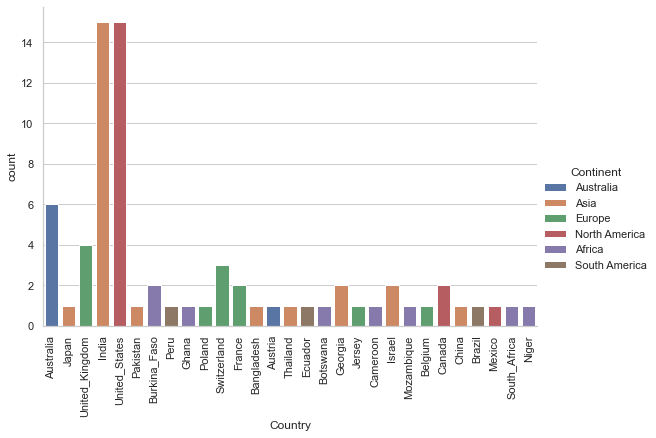

In [84]:
g = sns.factorplot(x="Country", kind="count", hue='Continent', data=c, orient='v', size=5, aspect=1.5,dodge=False)

g.set_xticklabels(rotation=90)

In [85]:
g.savefig('Plots/Country_continent.png')

From the above, we observe that lest basic machine learning techniques are widely used in malaria research, they are also being used by African researchers. Clearly, linear and logistic regression are widely used for identifying relationships between multiple factors for categorical and continuous variables, respectively. 

In [86]:
def convertDate(data):
    '''
    Given a dataframe, convert to date time and separate
    the date columns
    '''
    #data.set_index('Id', inplace=True)
    #### Conver the date column to date format
    data['date'] = pd.to_datetime(data['PubDate'], errors='coerce')
    data['year'] = data.date.dt.year
    data['month'] = data.date.dt.month
    ### Save the data in a csv for future re-use
    #data.to_csv(outcsv,sep='\t')
    return data

### Data Analysis and Visualization

Here we perform quick plots to understand trends in machine learning diffusion to malaria research. 

In [88]:
sns.set(style="white")

In [90]:
def plot_counts(machine):
    """
    Function to plot the counts of papers in each yeaar that 
    mention a machine learning algorithm
    """
    machine = machine.replace('"','')
    out_file = "_".join(machine.split())
    path = "Data/%s/metadata/%s.txt" % ('malaria',out_file)
    data = pd.read_table(path, index_col='Id')
    data = convertDate(data)
    data.dropna(axis = 0, how ='any',inplace=True)
    data.year = data.year.astype(int)
    ax = data['year'].value_counts().sort_index().plot(kind='bar',
                                     title='      Number of papers talking about malaria and %s per year'% machine,
                                                  figsize=(8, 6))
    ax.set_ylabel('Number of papers')
    ax.set_xlabel('Year')
    sns.despine()
    plt.savefig('Plots/malaria_%s.png' % out_file)

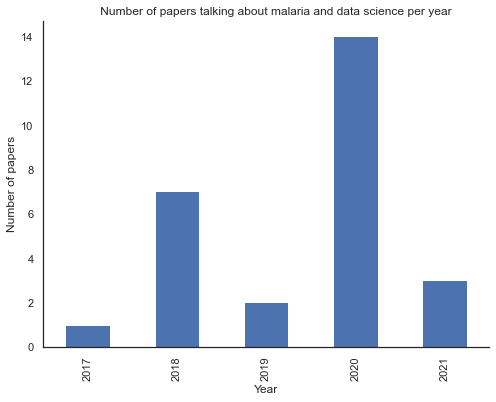

In [91]:
for machine in ml:
    plot_counts(machine)

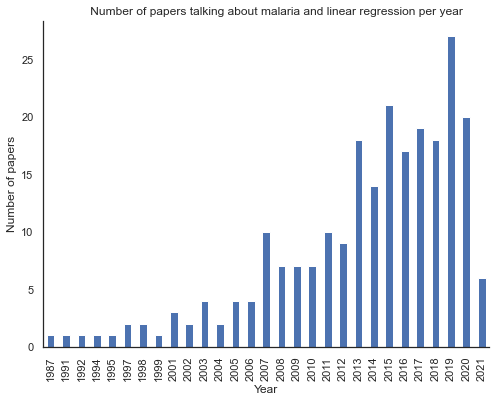

In [92]:
machine = "linear regression"
plot_counts(machine)

### Support vector machines

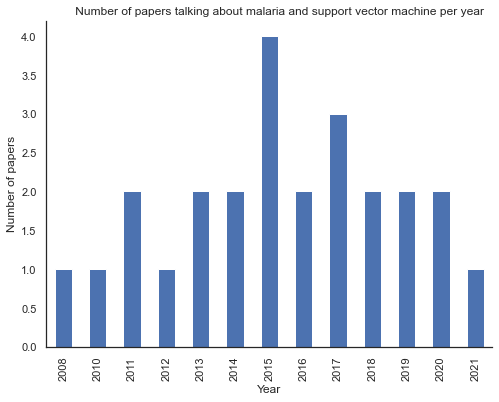

In [93]:
machine = "support vector machine"
plot_counts(machine)

### Neural networks

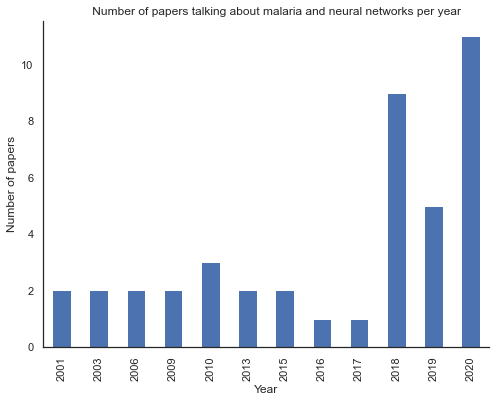

In [94]:
machine = "neural networks"
plot_counts(machine)

The above quick analysis seems to show that the algorithms popularity may have peeked in 2015, but have been on the decline ever since. We need to investigat this further. 

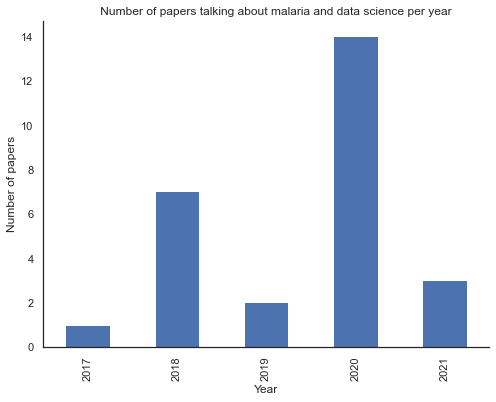

In [95]:
machine = "data science"
plot_counts(machine)